In [1]:
# dependencies
%matplotlib inline
import pandas as pd
import numpy as np
import csv
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime



In [4]:
# initializing training and test data from CSV files
train_file = "train.csv" 
test_file = "test.csv"
train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)
print(train_data.columns)
print(test_data.columns)
print(train_data.head())
print(train_data.describe())


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [3]:
# reformatting date from DD.MM.YYYY to YYYY-MM-DD
# %timeit train_data['date'] = pd.to_datetime(train_data['date'], dayfirst = True)
# print(train_data['date'])

# sorting by date ascending
#train_data.sort_values(by=['date'], inplace=True, ascending=True)

# saving df after reformatting date
#train_data.to_csv("sales_train_dateformatted.csv", index = False)

In [ ]:
train_grpby_

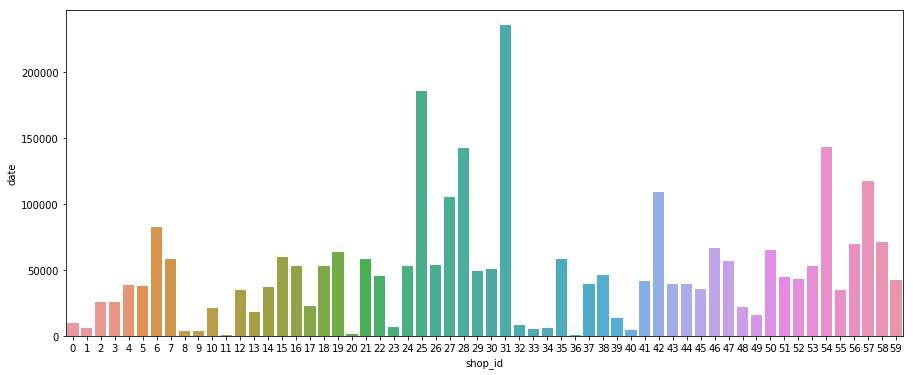

In [13]:
# groupby shop and count to plot # of rows associated with each location
train_data_grpby_shop_count = train_data.groupby('shop_id').count()

# plot # rows associated with location
plt.figure(figsize=(15,6))
x_axis = train_data_grpby_shop_count.index
sns.barplot(x = x_axis, y = train_data_grpby_shop_count['date'])
plt.show()

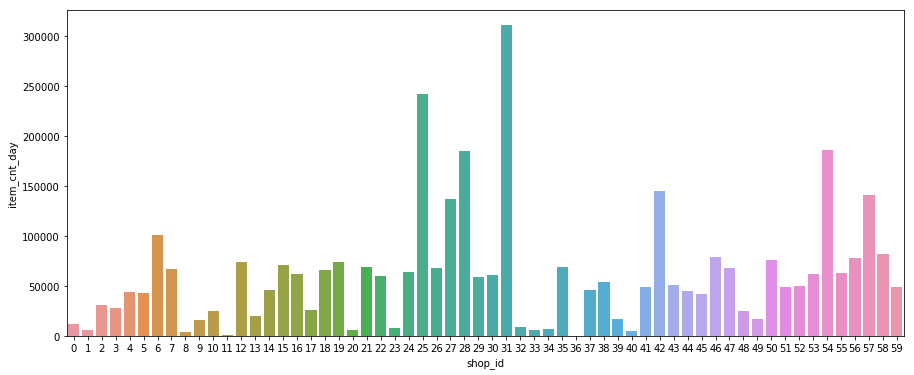

In [14]:
# groupby shop and sum to observe sales volume of all items for each location
train_data_grpby_shop_sum = train_data.groupby('shop_id').sum()

#plot sales volume for each location
plt.figure(figsize=(15,6))
sns.barplot(x = x_axis, y=train_data_grpby_shop_sum['item_cnt_day'])
plt.show()

               date  date_block_num  shop_id  item_id  item_price  \
2412161  2015-02-01              25       11     4181       866.0   
2412706  2015-02-01              25       11     3934      2866.0   
2412832  2015-02-01              25       11     3364       942.0   
2412971  2015-02-01              25       11     6766       342.0   
2412996  2015-02-01              25       11     6503      1189.0   

         item_cnt_day  
2412161           2.0  
2412706           1.0  
2412832           1.0  
2412971           1.0  
2412996           1.0  


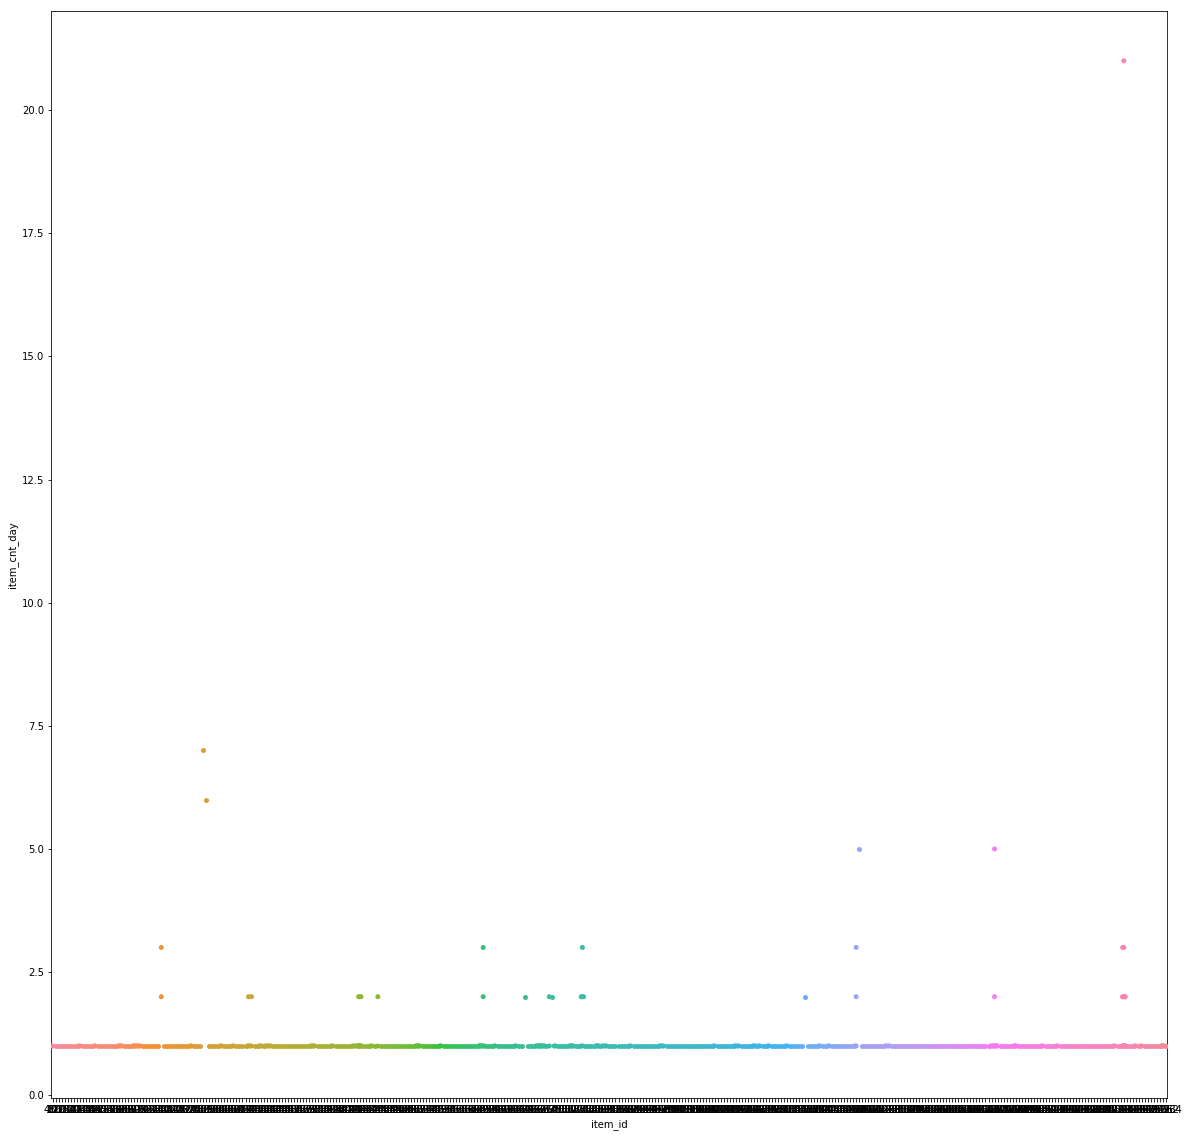

In [21]:
train_data_shop11 = train_data.loc[train_data['shop_id'] == 11]
print(train_data_shop11.head())

plt.figure(figsize=(20,20))
sns.swarmplot(data=train_data_shop11, x = 'item_id', y = 'item_cnt_day')
plt.show()

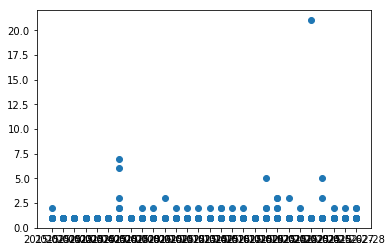

In [8]:
#sns.lmplot(data=train_data_shop11, x = 'date', y = 'item_cnt_day')
plt.scatter(train_data_shop11['date'], train_data_shop11['item_cnt_day'])
plt.show()

In [ ]:
# print(train_data.head())
# train_data_store1 = train_data.loc[train_data['shop_id'] == 1]
# train_data_store2 = train_data.loc[train_data['store'] == 2]
# train_data_store3 = train_data.loc[train_data['store'] == 3]
# train_data_store4 = train_data.loc[train_data['store'] == 4]
# train_data_store5 = train_data.loc[train_data['store'] == 5]
# train_data_store6 = train_data.loc[train_data['store'] == 6]
# train_data_store7 = train_data.loc[train_data['store'] == 7]
# train_data_store8 = train_data.loc[train_data['store'] == 8]
# train_data_store9 = train_data.loc[train_data['store'] == 9]
# train_data_store10 = train_data.loc[train_data['store'] == 10]
# train_data_store1.head()

In [ ]:
plt.scatter(train_data_store1['item'], train_data_store1['sales'], color = 'blue')

plt.show()


In [ ]:
plt.figure(figsize=(10,6))
sns.lmplot(data = train_data_store1, x = 'item', y='sales', fit_reg = False)
sns.lmplot(data = train_data_store2, x = 'item', y='sales', fit_reg = False)
sns.lmplot(data = train_data_store3, x = 'item', y='sales', fit_reg = False)
sns.lmplot(data = train_data_store4, x = 'item', y='sales', fit_reg = False)


plt.show()

In [ ]:
train_data_grpby_store_item = train_data.groupby(['store','item']).sum()
train_data_grpby_store_item.head()



In [ ]:
train_data_grpby_store_item_store1 = train_data_grpby_store_item.loc[train_data_grpby_store_item['store'] == 1]